In [1]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from collections import defaultdict,Counter
from sys import float_info

In [39]:
Allmarkers =pd.read_csv('D:/project/digestion_SI/hotspot_renew/Allmarker_mapping_gene.txt',sep='\t',header=0)
Modules =pd.read_csv('D:/project/digestion_SI/hotspot_renew/Module_gene_inter.txt',sep='\t',header=0)

In [3]:
Allmarkers[Allmarkers['type'] == 'Endothelial']

,gene,count,type
0,SMAD1,19,Endothelial
1,FERMT2,19,Endothelial
2,VGLL4,18,Endothelial
3,TIE1,18,Endothelial
4,SOCS3,18,Endothelial
...,...,...,...
16522,PPP1R3A,1,Endothelial
16523,lamprey21127,1,Endothelial
16524,lamprey20387,1,Endothelial
16525,lamprey03115,1,Endothelial


In [3]:
def get_compare(gene1,gene2):
    allgene = list(set(gene1['gene'].to_list()+gene2['gene'].to_list()))
    def get_count(gname,genedata):
        if(len(genedata[genedata['gene']==gname]))==0:
            return 0
        else:
            return genedata[genedata['gene']==gname]['count'].to_list()[0]
    allmarker=[]
    module=[]
    for gene in allgene:
        allmarker.append(get_count(gene,gene1))
        module.append(get_count(gene,gene2))
    ret = pd.DataFrame()
    ret['allmarker'] = allmarker
    ret['module'] = module
    ret['gene'] = allgene
    return ret

def draw_compare(gene1, gene2, title, output_dir=None):
    drawdata = get_compare(gene1, gene2)
    drawheatmap = np.zeros((gene2['count'].max() + 1, gene1['count'].max() + 1))
    # 填充计数矩阵
    for _, row in drawdata.iterrows():
        drawheatmap[row['module'], row['allmarker']] += 1
    # 转换为 DataFrame 并倒序索引
    drawheatmap = pd.DataFrame(drawheatmap).iloc[::-1]
    annot_data = drawheatmap.apply(lambda col: col.map(lambda x: '' if x > 99 else f"{int(x)}"))  
    # 可视化设置
    plt.figure(figsize=(6, 6))
    cbar_kws = {"shrink": 0.25}
    annot_kws = {'size': 7}
    sns.heatmap(
        drawheatmap,
        cmap='Blues',
        square=True,
        norm=LogNorm(),  # 对数色阶
        annot=annot_data,  # 条件注释
        fmt='',           # 禁用自动格式化
        linewidth=0.5,
        cbar_kws=cbar_kws,
        annot_kws=annot_kws
    )
    plt.xlabel('Number of All Markers', fontsize=10)
    plt.ylabel('Number of Modules', fontsize=10)
    plt.title(f'Conservation Marker of {title}', fontsize=10)
    # 设置字体
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['font.family'] = 'Arial'
    # 保存结果
    if output_dir:
        plt.savefig(output_dir, format="pdf", dpi=300, bbox_inches="tight")
    return drawdata, drawheatmap

In [15]:
#test,横纵坐标用n表示
def get_compare(gene1, gene2):
    allgene = list(set(gene1['gene'].to_list() + gene2['gene'].to_list()))

    def get_count(gname, genedata):
        if len(genedata[genedata['gene'] == gname]) == 0:
            return 0
        else:
            return genedata[genedata['gene'] == gname]['count'].to_list()[0]

    allmarker = []
    module = []
    for gene in allgene:
        allmarker.append(get_count(gene, gene1))
        module.append(get_count(gene, gene2))

    ret = pd.DataFrame()
    ret['allmarker'] = allmarker
    ret['module'] = module
    ret['gene'] = allgene
    return ret


def draw_compare_public(gene1, gene2, title, output_dir=None):
    drawdata = get_compare(gene1, gene2)
    drawheatmap = np.zeros((gene2['count'].max() + 1, gene1['count'].max() + 1))
    # 填充计数矩阵
    for _, row in drawdata.iterrows():
        drawheatmap[row['module'], row['allmarker']] += 1
    # 转换为 DataFrame 并倒序索引
    drawheatmap = pd.DataFrame(drawheatmap).iloc[::-1]
    annot_data = drawheatmap.apply(lambda col: col.map(lambda x: '' if x > 99 else f"{int(x)}"))

    # 可视化设置
    plt.figure(figsize=(6, 6))
    cbar_kws = {"shrink": 0.25}
    annot_kws = {'size': 7}
    sns.heatmap(
        drawheatmap,
        cmap='Blues',
        square=True,
        norm=LogNorm(),  # 对数色阶
        annot=annot_data,  # 条件注释
        fmt='',  # 禁用自动格式化
        linewidth=0.5,
        cbar_kws=cbar_kws,
        annot_kws=annot_kws
    )

    # 修改横坐标标签
    max_count_x = gene1['count'].max()
    xtick_labels = [f"n-{i}" if i > 0 else "n" for i in range(max_count_x, -1, -1)]
    plt.xticks(range(len(xtick_labels)), xtick_labels, rotation=45, fontsize=10)

    # 修改纵坐标标签
    max_count_y = gene2['count'].max()
    ytick_labels = [f"n-{i}" if i > 0 else "n" for i in range(max_count_y, -1, -1)]
    ytick_labels = ytick_labels[::-1]
    plt.yticks(range(len(ytick_labels)), ytick_labels, fontsize=10,rotation=360)

    plt.xlabel('Number of All Markers', fontsize=10)
    plt.ylabel('Number of Modules', fontsize=10)
    plt.title(f'Conservation Marker of {title}', fontsize=10)
    # 设置字体
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['font.family'] = 'Arial'
    # 保存结果
    if output_dir:
        plt.savefig(output_dir, format="pdf", dpi=300, bbox_inches="tight")
    return drawdata, drawheatmap


['SCG2', 'PCSK1', 'SCGN', 'SCG3', 'FEV', 'SCG5']

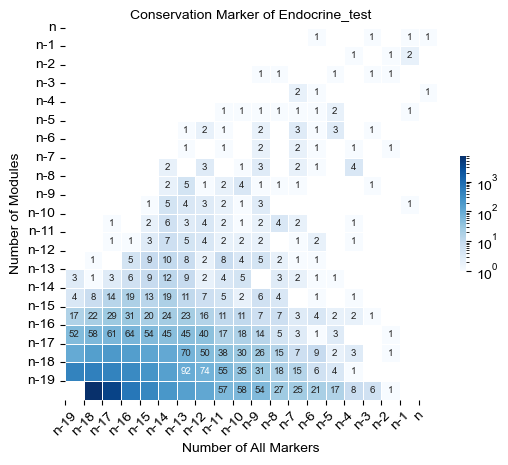

In [ ]:
#Endocrine_public_public
Endocrine_public_data,drawheatmap = draw_compare_public(Allmarkers[Allmarkers['type'] == 'Endocrine'],Modules[Modules['type'] == 'Endocrine'],'Endocrine','D:/project/digestion_SI/picture/Endocrine_crossmarker')
Endocrine_public_gene = Endocrine_public_data[(Endocrine_public_data['allmarker']>=17)&(Endocrine_public_data['module']>=17)]['gene'].to_list()
Endocrine_public_gene

['CPE', 'SCGN']

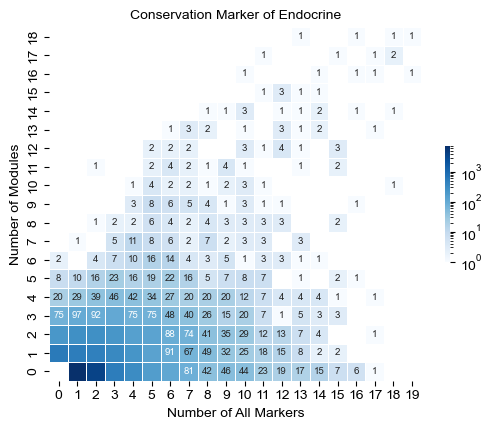

In [37]:
#Endocrine
Endocrine_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Endocrine'],Modules[Modules['type'] == 'Endocrine'],'Endocrine')
Endocrine_gene = Endocrine_data[(Endocrine_data['allmarker']>=19)&(Endocrine_data['module']>=16)]['gene'].to_list()
Endocrine_gene

In [38]:
Endocrine_gene = Endocrine_data[(Endocrine_data['allmarker']>=16)&(Endocrine_data['module']>=16)]['gene'].to_list()
Endocrine_gene

['NEUROD1', 'SCG5', 'PCSK1', 'SCG2', 'CPE', 'SCGN', 'PAX6', 'SCG3', 'FEV']

In [8]:
Endocrine_gene = Endocrine_data[(Endocrine_data['allmarker']>=16)&(Endocrine_data['module']>=19)]['gene'].to_list()
Endocrine_gene

['PAX6', 'PCSK1', 'SCGN']

['PLXND1',
 'ZNF521',
 'TIE1',
 'FLI1',
 'LDB2',
 'EPHB4',
 'KDR',
 'MYCT1',
 'ADGRL4',
 'CAVIN2',
 'SMAD1',
 'PTPRB',
 'KANK3']

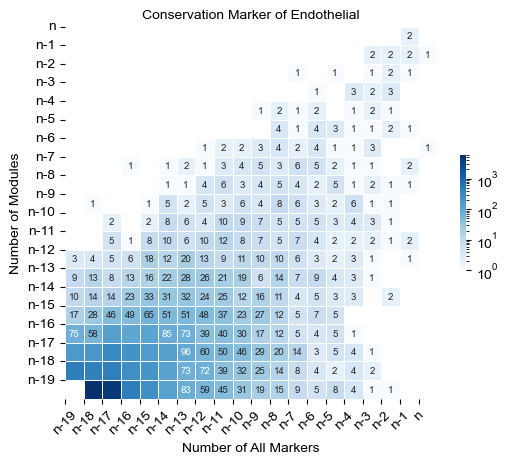

In [16]:
#Endothelial_test—test
Endothelial_public_data,drawheatmap = draw_compare_public(Allmarkers[Allmarkers['type'] == 'Endothelial'],Modules[Modules['type'] == 'Endothelial'],'Endothelial','D:/project/digestion_SI/hotspot_renew/picture/Endothelial_crossmarker.pdf')
Endothelial_public_gene = Endothelial_public_data[(Endothelial_public_data['allmarker']>=17)&(Endothelial_public_data['module']>=16)]['gene'].to_list()
Endothelial_public_gene

['KANK3', 'ADGRL4', 'SMAD1', 'PTPRB', 'TIE1', 'PLXND1']

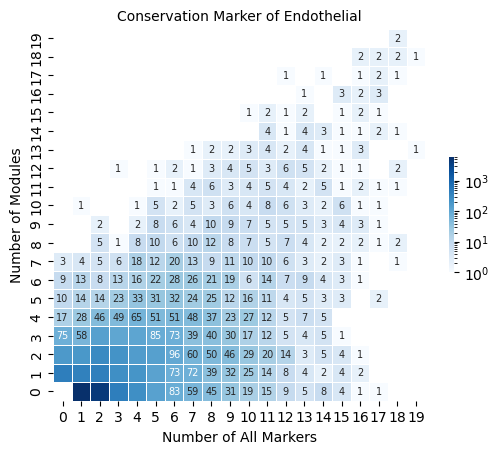

In [4]:
#Endothelial
Endothelial_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Endothelial'],Modules[Modules['type'] == 'Endothelial'],'Endothelial')
Endothelial_gene = Endothelial_data[(Endothelial_data['allmarker']>=18)&(Endothelial_data['module']>=16)]['gene'].to_list()
Endothelial_gene

In [12]:
Endothelial_gene = Endothelial_data[(Endothelial_data['allmarker']>=15)&(Endothelial_data['module']>=15)]['gene'].to_list()
Endothelial_gene

['CALCRL',
 'KANK3',
 'KDR',
 'EPHB4',
 'S1PR1',
 'SEMA6A',
 'FLI1',
 'MYCT1',
 'ADGRL4',
 'FLT4',
 'SHE',
 'SMAD1',
 'VWF',
 'PTPRM',
 'PTPRB',
 'TIE1',
 'CAVIN2',
 'LDB2',
 'FGD5',
 'TFPI2',
 'WWC3',
 'PLXND1',
 'ZNF521',
 'AKAP12',
 'MRC1']

['RSPH3',
 'DNAI1',
 'IQCA1',
 'CCDC173',
 'MAP9',
 'MDM1',
 'TRAF3IP1',
 'GAS8',
 'MEIG1',
 'AK7']

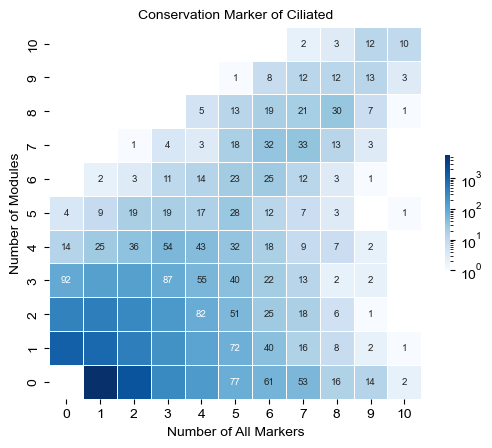

In [13]:
#Ciliated
Ciliated_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Ciliated'],Modules[Modules['type'] == 'Ciliated'],'Ciliated')
Ciliated_gene = Ciliated_data[(Ciliated_data['allmarker']>=10)&(Ciliated_data['module']>=10)]['gene'].to_list()
Ciliated_gene

['SPARC', 'COL1A1', 'CALD1', 'COL6A2', 'COL1A2', 'COL6A1', 'FSTL1', 'FN1']

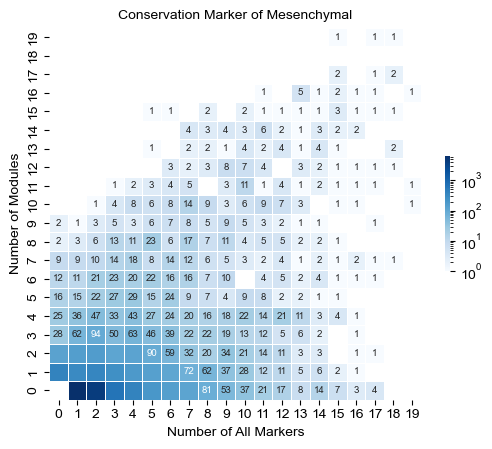

In [5]:
#Mesenchymal
Mesenchymal_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Mesenchymal'],Modules[Modules['type'] == 'Mesenchymal'],'Mesenchymal')
Mesenchymal_gene = Mesenchymal_data[(Mesenchymal_data['allmarker']>=16)&(Mesenchymal_data['module']>=16)]['gene'].to_list()
Mesenchymal_gene

In [11]:
Mesenchymal_gene = Mesenchymal_data[(Mesenchymal_data['allmarker']>=12)&(Mesenchymal_data['module']>=12)]['gene'].to_list()
Mesenchymal_gene

['PLOD2',
 'MXRA8',
 'HSPB1',
 'CPZ',
 'SPARC',
 'P4HA2',
 'TNS2',
 'AEBP1',
 'FERMT2',
 'METRNL',
 'COL15A1',
 'COLEC12',
 'COL1A1',
 'CD99',
 'AMOTL2',
 'CALD1',
 'COL6A2',
 'CDH11',
 'COL1A2',
 'DPYSL3',
 'ANGPTL2',
 'THBS2',
 'NID1',
 'COL6A1',
 'ANXA1',
 'SOCS3',
 'PDGFRA',
 'FSTL1',
 'ITGB1',
 'ECM1',
 'SERPINH1',
 'PLPP3',
 'FHL1',
 'COL5A2',
 'GPM6B',
 'NR2F1',
 'DCN',
 'AHNAK',
 'MMP2',
 'TIMP3',
 'FOXF1',
 'FLNA',
 'SPON1',
 'FN1',
 'FBN1',
 'TGM2',
 'C7',
 'COL12A1',
 'COL5A1',
 'COL16A1',
 'COL6A3',
 'THBS1',
 'CD81',
 'BMP4',
 'LAMA4',
 'CYR61',
 'AKAP12',
 'MYH10',
 'PID1']

[]

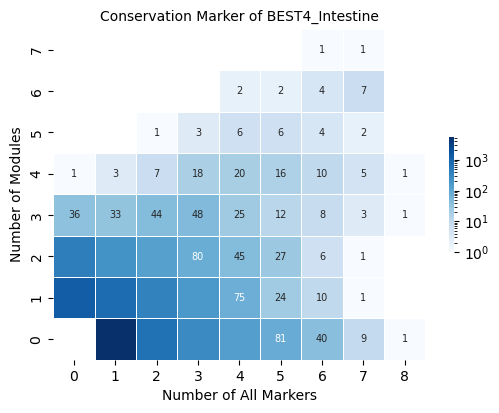

In [5]:
#BEST4_Intestine
BEST4_Intestine_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'BEST4_Intestine'],Modules[Modules['type'] == 'BEST4_Intestine'],'BEST4_Intestine')
BEST4_Intestine_gene = BEST4_Intestine_data[(BEST4_Intestine_data['allmarker']>=19)&(BEST4_Intestine_data['module']>=15)]['gene'].to_list()
BEST4_Intestine_gene

In [6]:
BEST4_Intestine_gene = BEST4_Intestine_data[(BEST4_Intestine_data['allmarker']>=7)&(BEST4_Intestine_data['module']>=6)]['gene'].to_list()
BEST4_Intestine_gene

['DSP', 'SERPINB1', 'GPA33', 'CDH17', 'CALML4', 'PLLP', 'F11R', 'MYRFL']

In [4]:
Allmarkers['type'].unique()

array(['Endothelial', 'Endocrine', 'Myeloid', 'T_cell', 'Mesenchymal',
       'Enterocyte_Intestine', 'B_cell', 'Goblet_Intestine', 'Ciliated',
       'Tuft', 'Mucus_Stomach', 'BEST4_Intestine', 'Oxynticopeptic'],
      dtype=object)

['PSAP', 'CTSD']

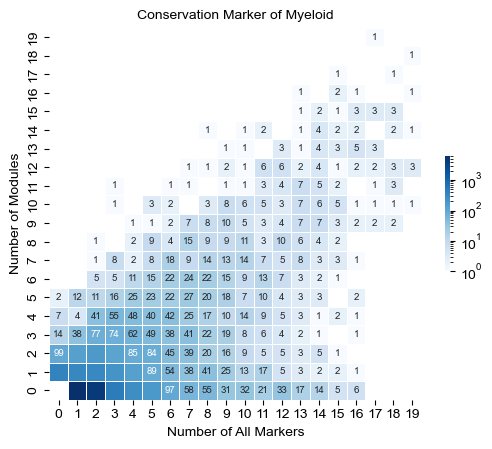

In [14]:
#Myeloid
Myeloid_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Myeloid'],Modules[Modules['type'] == 'Myeloid'],'Myeloid')
Myeloid_gene = Myeloid_data[(Myeloid_data['allmarker']>=19)&(Myeloid_data['module']>=15)]['gene'].to_list()
Myeloid_gene

In [25]:
Myeloid_gene = Myeloid_data[(Myeloid_data['allmarker']>=16)&(Myeloid_data['module']>=15)]['gene'].to_list()
Myeloid_gene

['NPC2',
 'MPEG1',
 'PSAP',
 'CTSD',
 'CTSA',
 'CYBB',
 'NCF2',
 'CTSC',
 'GRN',
 'RNASEK',
 'ASAH1',
 'RNASET2',
 'SPI1',
 'HEXB']

[]

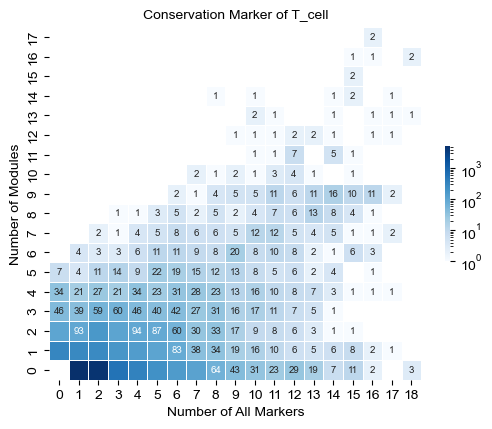

In [15]:
#T_cell
T_cell_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'T_cell'],Modules[Modules['type'] == 'T_cell'],'T_cell')
T_cell_gene = T_cell_data[(T_cell_data['allmarker']>=19)&(T_cell_data['module']>=15)]['gene'].to_list()
T_cell_gene

In [26]:
T_cell_gene = T_cell_data[(T_cell_data['allmarker']>=15)&(T_cell_data['module']>=15)]['gene'].to_list()
T_cell_gene

['LCK', 'IL2RG', 'SLA2', 'FGD3', 'ZAP70', 'STAT4', 'BCL11B', 'CD247']

[]

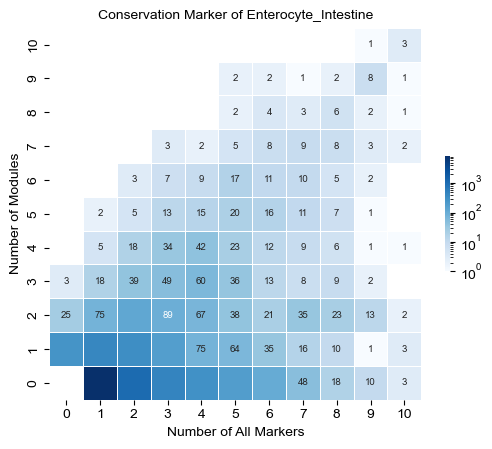

In [16]:
#Enterocyte_Intestine
Enterocyte_Intestine_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Enterocyte_Intestine'],Modules[Modules['type'] == 'Enterocyte_Intestine'],'Enterocyte_Intestine')
Enterocyte_Intestine_gene = Enterocyte_Intestine_data[(Enterocyte_Intestine_data['allmarker']>=15)&(Enterocyte_Intestine_data['module']>=15)]['gene'].to_list()
Enterocyte_Intestine_gene

In [35]:
Enterocyte_Intestine_gene = Enterocyte_Intestine_data[(Enterocyte_Intestine_data['allmarker']>=9)&(Enterocyte_Intestine_data['module']>=9)]['gene'].to_list()
Enterocyte_Intestine_gene

['MTTP',
 'ACE2',
 'MGAM',
 'SLC6A19',
 'ANPEP',
 'SLC15A1',
 'FABP1',
 'SLC5A1',
 'ASAH2',
 'SLC3A1',
 'CIDEB',
 'PLA2G12B',
 'APOB']

['HERPUD1']

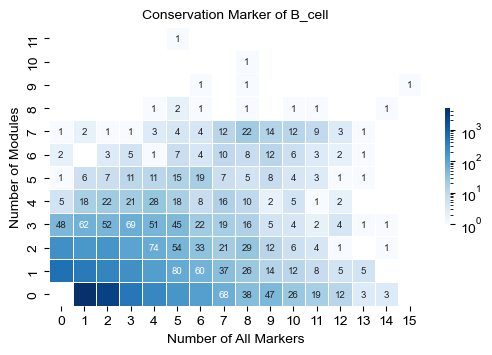

In [27]:
#B_cell
B_cell_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'B_cell'],Modules[Modules['type'] == 'B_cell'],'B_cell')
B_cell_gene = B_cell_data[(B_cell_data['allmarker']>=9)&(B_cell_data['module']>=9)]['gene'].to_list()
B_cell_gene

In [30]:
B_cell_gene = B_cell_data[(B_cell_data['allmarker']>=12)&(B_cell_data['module']>=7)]['gene'].to_list()
B_cell_gene

['HERPUD1', 'RPLP0', 'RPL22', 'HSP90B1', 'INPP5D', 'CD79B']

[]

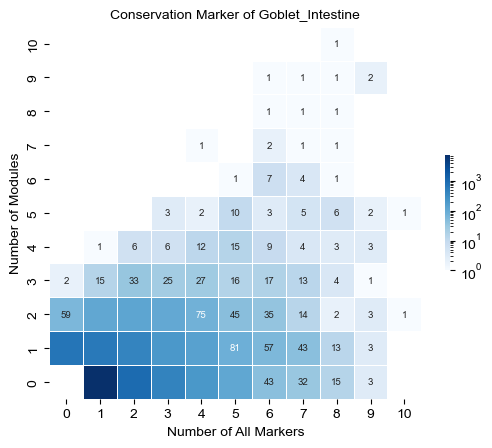

In [18]:
#Goblet_Intestine
Goblet_Intestine_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Goblet_Intestine'],Modules[Modules['type'] == 'Goblet_Intestine'],'Goblet_Intestine')
Goblet_Intestine_gene = Goblet_Intestine_data[(Goblet_Intestine_data['allmarker']>=19)&(Goblet_Intestine_data['module']>=15)]['gene'].to_list()
Goblet_Intestine_gene

In [28]:
Goblet_Intestine_gene = Goblet_Intestine_data[(Goblet_Intestine_data['allmarker']>=7)&(Goblet_Intestine_data['module']>=7)]['gene'].to_list()
Goblet_Intestine_gene

['FGFR2',
 'ANO7',
 'MUC2',
 'SLC12A8',
 'STARD10',
 'FER1L6',
 'GALNT12',
 'AGR2',
 'SPDEF']

[]

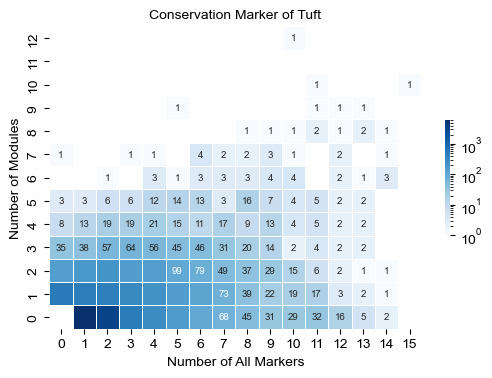

In [19]:
#Tuft
Tuft_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Tuft'],Modules[Modules['type'] == 'Tuft'],'Tuft')
Tuft_gene = Tuft_data[(Tuft_data['allmarker']>=19)&(Tuft_data['module']>=15)]['gene'].to_list()
Tuft_gene

In [32]:
Tuft_gene = Tuft_data[(Tuft_data['allmarker']>=11)&(Tuft_data['module']>=8)]['gene'].to_list()
Tuft_gene

['PLEKHG3',
 'PLCG2',
 'LRMP',
 'SMPX',
 'BANK1',
 'AVIL',
 'BTK',
 'CD9',
 'MYO1B',
 'ALOX5',
 'LTC4S']

[]

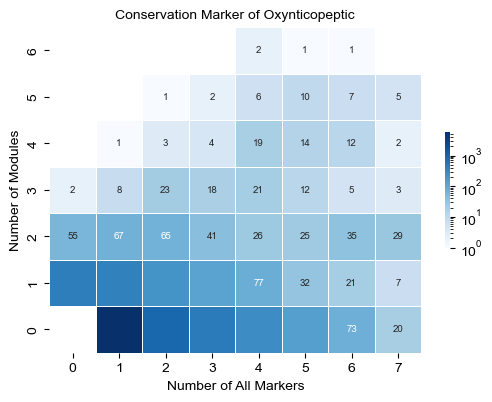

In [20]:
#Oxynticopeptic
Oxynticopeptic_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Oxynticopeptic'],Modules[Modules['type'] == 'Oxynticopeptic'],'Oxynticopeptic')
Oxynticopeptic_gene = Oxynticopeptic_data[(Oxynticopeptic_data['allmarker']>=19)&(Oxynticopeptic_data['module']>=15)]['gene'].to_list()
Oxynticopeptic_gene

In [33]:
Oxynticopeptic_gene = Oxynticopeptic_data[(Oxynticopeptic_data['allmarker']>=6)&(Oxynticopeptic_data['module']>=5)]['gene'].to_list()
Oxynticopeptic_gene

['ATP5MG',
 'PGC',
 'PGA3',
 'ATP5PD',
 'ATP4B',
 'COX6B1',
 'ATP5MC3',
 'NDUFB7',
 'ESRRG',
 'ATP5F1B',
 'MPC2',
 'SLC25A3',
 'IDH2']

[]

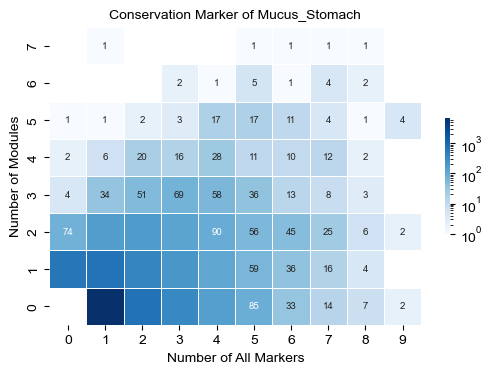

In [21]:
#Mucus_Stomach
Mucus_Stomach_data,drawheatmap = draw_compare(Allmarkers[Allmarkers['type'] == 'Mucus_Stomach'],Modules[Modules['type'] == 'Mucus_Stomach'],'Mucus_Stomach')
Mucus_Stomach_gene = Mucus_Stomach_data[(Mucus_Stomach_data['allmarker']>=19)&(Mucus_Stomach_data['module']>=15)]['gene'].to_list()
Mucus_Stomach_gene

In [34]:
Mucus_Stomach_gene = Mucus_Stomach_data[(Mucus_Stomach_data['allmarker']>=7)&(Mucus_Stomach_data['module']>=6)]['gene'].to_list()
Mucus_Stomach_gene

['BCAS1', 'PHLDA2', 'SPINT1', 'GSTO1', 'RHPN2', 'FERMT1', 'PLLP', 'VILL']